In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# Load the Datafrom CSV
df=pd.read_csv("/home/sathish/Downloads/House.csv")

In [3]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:

df1=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]



In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


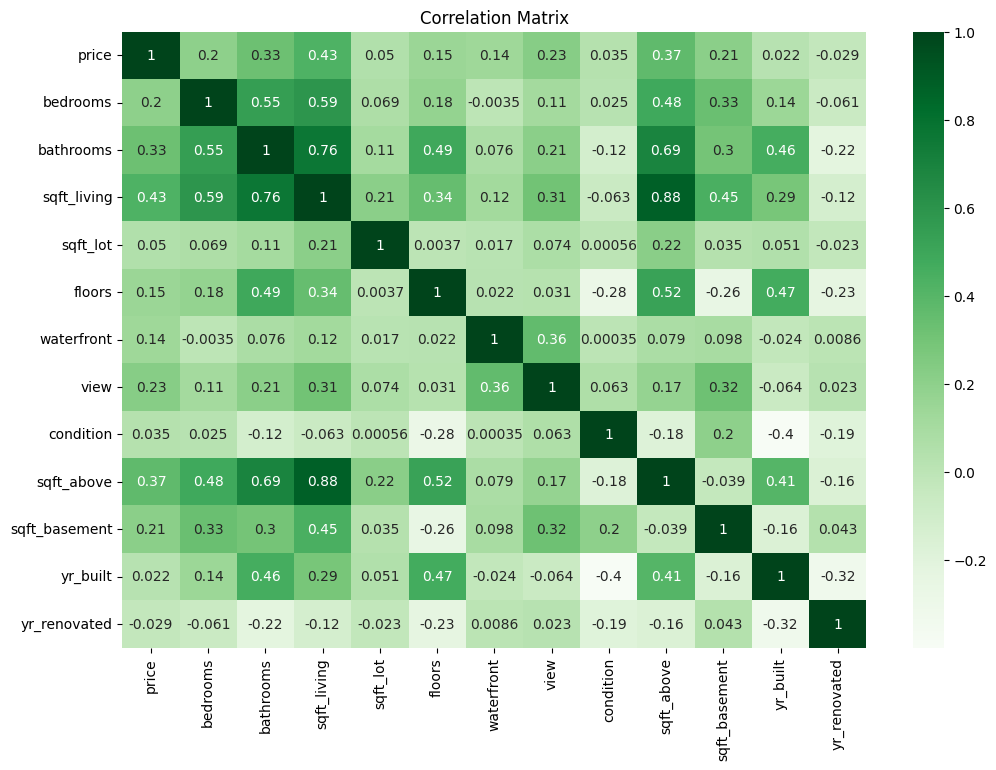

In [8]:
correlation_matrix=df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Greens')
plt.title("Correlation Matrix")
plt.show()

In [9]:
x=df1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition']]
y=df1['price']

In [10]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,3.0,1.50,1340,7912,1.5,3
1,5.0,2.50,3650,9050,2.0,5
2,3.0,2.00,1930,11947,1.0,4
3,3.0,2.25,2000,8030,1.0,4
4,4.0,2.50,1940,10500,1.0,4
...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,4
4596,3.0,2.50,1460,7573,2.0,3
4597,3.0,2.50,3010,7014,2.0,3
4598,4.0,2.00,2090,6630,1.0,3


In [11]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [12]:
# splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
1898,4.0,2.50,2770,45514,2.0,4
1370,4.0,3.00,3720,29043,2.0,3
3038,4.0,2.50,2810,11120,2.0,3
2361,4.0,3.75,4030,10800,2.0,3
156,3.0,2.00,2000,7000,2.0,3
...,...,...,...,...,...,...
4426,3.0,1.00,1180,5002,1.5,3
466,4.0,2.00,2520,6000,1.0,3
3092,3.0,1.00,1150,8145,1.0,4
3772,2.0,1.00,910,2002,1.5,3


In [14]:
y_train

1898    6.850000e+05
1370    8.570000e+05
3038    6.750000e+05
2361    1.485000e+06
156     5.610000e+05
            ...     
4426    2.825089e+05
466     8.750000e+05
3092    2.900000e+05
3772    6.000000e+05
860     4.750000e+05
Name: price, Length: 3680, dtype: float64

In [15]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
3683,3.0,2.50,1460,1613,2.0,3
4411,5.0,2.25,2000,7900,1.0,4
2584,3.0,3.25,2940,5432,3.0,4
69,3.0,2.50,2200,7350,1.0,5
1844,3.0,2.50,1720,8755,1.0,3
...,...,...,...,...,...,...
1612,3.0,1.75,1700,8400,1.0,3
1068,5.0,2.00,1930,6120,1.5,3
4350,3.0,2.00,1180,7793,1.0,4
3027,4.0,2.50,2370,10083,2.0,5


In [16]:
y_test

3683      544000.0
4411           0.0
2584     1712500.0
69        365000.0
1844      275000.0
           ...    
1612      750000.0
1068      230000.0
4350    26590000.0
3027      687000.0
3455      289659.0
Name: price, Length: 920, dtype: float64

In [17]:
# building the linear regression model
model1=LinearRegression()

#fitting the model on the training data
model1.fit(x_train,y_train)

LinearRegression()

In [18]:
# model evaluation
y_pred=model1.predict(x_test)

In [19]:
#mean squared error and R-squared for model evaluation
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [20]:
print("Mean Squred Error :",mse)
print("R-squared:",r2)

Mean Squred Error : 988418836231.0718
R-squared: 0.03081592061525984


In [21]:
# mean squred error and r-squared for model evaluation
mse=mean_squared_error(y_test,y_pred)
r3=r2_score(y_test,y_pred)
print("Mean squared error :",mse)
print("R_squared",r3)

Mean squared error : 988418836231.0718
R_squared 0.03081592061525984


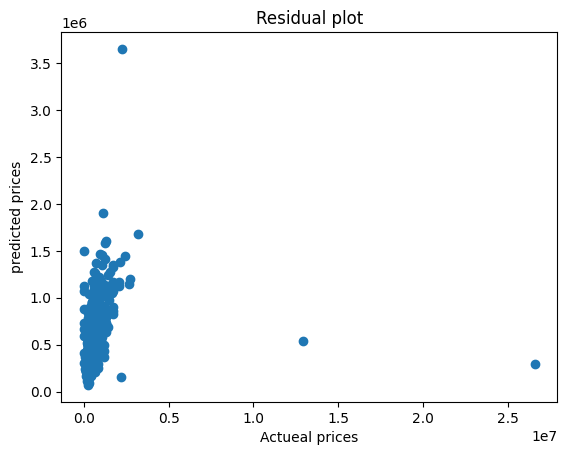

In [22]:
# predicttion and visualization 
# to visualize the prediction against actual prices weell use a scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel("Actueal prices")
plt.ylabel("predicted prices")
plt.title("Residual plot")
plt.show()

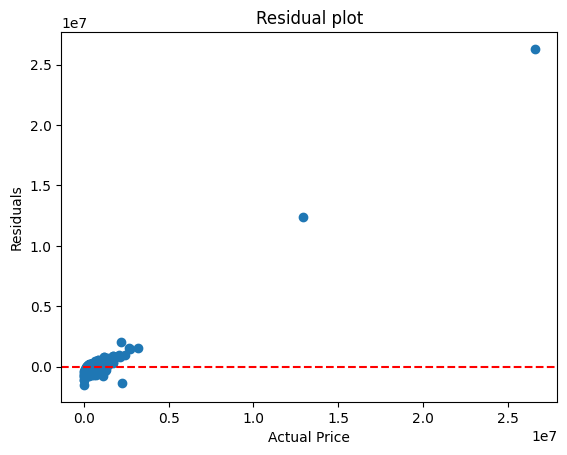

In [26]:
residual=y_test-y_pred
plt.scatter(y_test,residual)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

In [24]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data=[[5.0,1.30,1800,1589,3.0,5]]
predicted_price=model1.predict(new_data)
print("predicted price:",predicted_price[0])

predicted price: 487194.6610084983


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
